# Protein Interactions Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
G = nx.read_edgelist('networks/networks_barabasi/protein.edgelist.txt',create_using=nx.Graph(), nodetype = int)

## Visualização

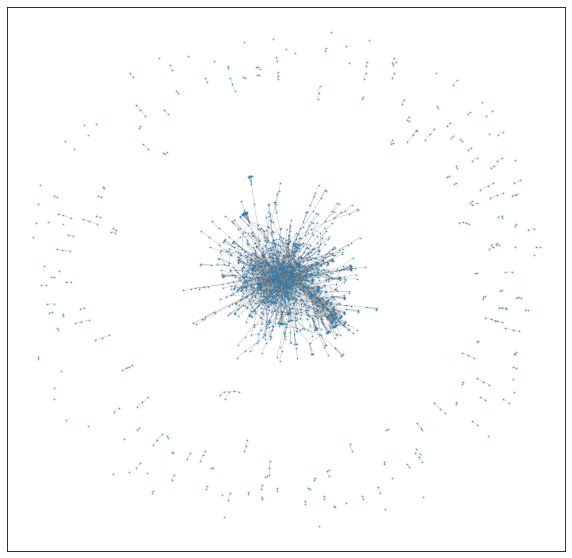

In [224]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G, node_size=1, edge_color='grey', alpha=0.5, width=0.5, with_labels=False)
plt.show()

## Caracterização

In [3]:
n = G.number_of_nodes()
m = G.number_of_edges()
print('Número de vértices:', n)
print('Número de arestas:', m)
print('Grafo conexo?',nx.is_connected(G))

Número de vértices: 2018
Número de arestas: 2930
Grafo conexo? False


### 1) Grau

In [67]:
degrees = np.array([val for (node, val) in G.degree()])

In [68]:
from statistics import median
print('Máximo:', degrees.max())
print('Mínimo:', degrees.min())
print('Média:',degrees.mean())
print('Mediana:', median(degrees))
print('Desvio padrão:', degrees.std())


Máximo: 91
Mínimo: 1
Média: 2.9038652130822595
Mediana: 2.0
Desvio padrão: 4.881923426132511


#### Distribuição empírica

PMF:

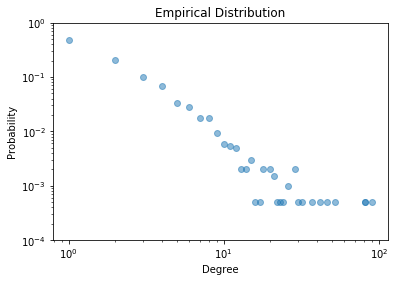

In [229]:
x, f = np.unique(degrees, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf, alpha=0.5)
plt.ylim(10**-4, 10**0)
plt.title('Empirical Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xscale('log')
plt.yscale('log')
plt.show()

CCDF:

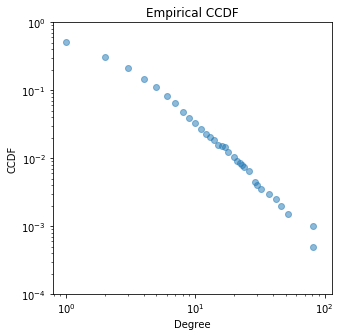

In [230]:
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.figure(figsize=(5,5))
plt.title('Empirical CCDF')
plt.scatter(x,ccdf,alpha=0.5)
plt.ylim(10**-4, 10**0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.show()

In [232]:
np.savetxt('vectors/protein-degree-ccdf.txt', [ccdf], delimiter=',', fmt='%f')
np.savetxt('vectors/protein-degree-x.txt', [x], delimiter=',', fmt='%d')

### 2) Distância 

Calculando a distância entre cada par de vértices:

In [25]:
dist = np.array([])
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v) # distância short path lenght
    spl2 = dict((v2,d) for v2,d in spl.items() if v2 != v) # distância exluindo d(v,v)
    dist = np.append(dist, list(spl2.values()))

Estatísticas básicas:

In [27]:
print('Máximo:', dist.max())
print('Mínimo:', dist.min())
print('Média:',dist.mean())
print('Mediana:', median(dist))
print('Desvio padrão:', dist.std())

Máximo: 14.0
Mínimo: 1.0
Média: 5.6109290866980395
Mediana: 6.0
Desvio padrão: 1.646376867828377


Verificando o cálculo da distância média através do método disponibilizado pela biblioteca:

In [41]:
if nx.is_connected(G):
    d_mean = nx.average_shortest_path_length(G)
    print('Distância média:',d_mean)
else:
    print('Rede não é conexa!')

Rede não é conexa!


Empirical Distribution:

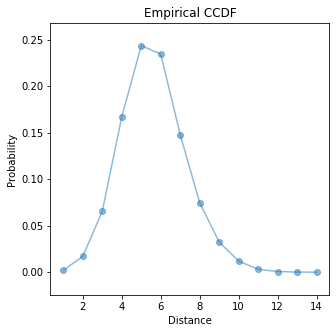

In [233]:
x, f_d = np.unique(dist, return_counts=True)
pmf = f_d/f_d.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical CCDF')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x,pmf,alpha=0.5)
plt.plot(x,pmf, alpha=0.5)
plt.show()

CCDF:

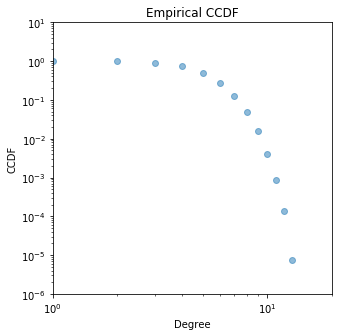

In [234]:
cdf = f_d.cumsum()/f_d.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x,ccdf,alpha=0.5)
plt.title('Empirical CCDF')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')

plt.ylim(10**-6, 10**1)
plt.xlim(10**0, 2*10**1)
plt.show()

In [235]:
np.savetxt('vectors/protein-dist-x.txt', [x], delimiter=',', fmt='%d')
np.savetxt('vectors/protein-dist-pmf.txt', [pmf], delimiter=',', fmt='%f')
np.savetxt('vectors/protein-dist-ccdf.txt', [ccdf], delimiter=',', fmt='%f')

### 3) Tamanho das componentes conexas

Número de componentes conexas:

In [43]:
nx.number_connected_components(G)

185

Tamanho das componentes:

In [143]:
len_cc = np.array([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
print('Máximo:', len_cc.max())
print('Mínimo:', len_cc.min())
print('Média:',len_cc.mean())
print('Mediana:', median(len_cc))
print('Desvio padrão:', len_cc.std())


Máximo: 1647
Mínimo: 1
Média: 10.908108108108108
Mediana: 2
Desvio padrão: 120.61745285927152


PMF:

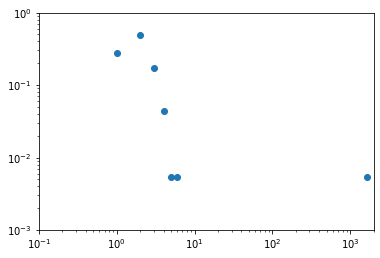

In [154]:
x, f = np.unique(len_cc, return_counts=True)
pmf = f/f.sum()
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-3, 10**0)
plt.xlim(10**-1, 2*10**3)
plt.scatter(x,pmf)
plt.show()

CCDF:

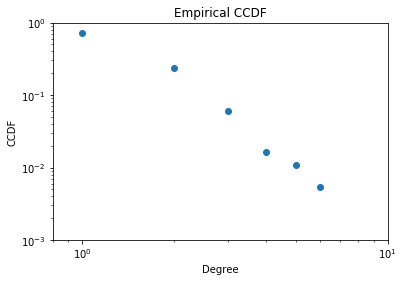

In [164]:
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf

plt.scatter(x,ccdf)
plt.title('Empirical CCDF')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-3, 10**0)
plt.xlim(8*10**-1, 10**1)
plt.show()

### 4) Clusterização

#### 4.1) Clusterização Local

Conforme definição de Barabási:

In [77]:
cluster = np.array(list(nx.clustering(G).values()))
print('Máximo:', cluster.max())
print('Mínimo:', cluster.min())
print('Média:', cluster.mean())
print('Mediana:', median(cluster))
print('Desvio padrão:', cluster.std())

Máximo: 1.0
Mínimo: 0.0
Média: 0.046194001297365124
Mediana: 0.0
Desvio padrão: 0.17603114068332915


Verificando a clusterização média:

In [78]:
nx.average_clustering(G)

0.046194001297365166

PMF:

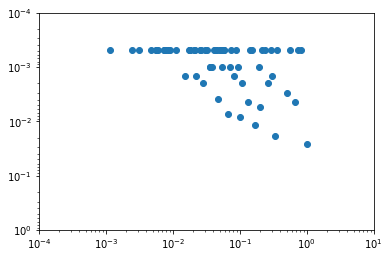

In [120]:
x, f = np.unique(cluster, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf, alpha=0.5)
plt.title('Empirical Distribution')
plt.xlabel('Cluster')
plt.ylabel('Probabilty')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**0, 10**-4)
plt.xlim(10**-4, 10**1)
plt.show()

CCDF:

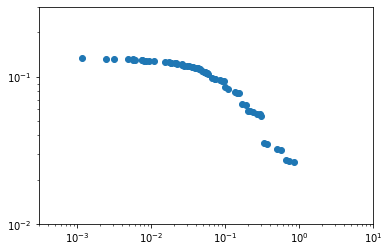

In [141]:
x, f = np.unique(cluster, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Cluster')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-2, 3*10**-1)
plt.xlim(3*10**-4, 10**1)
plt.show()

#### 4.2) Clusterização global

In [17]:
n_triang = np.array(list(nx.triangles(G).values())).sum()/3 # método conta 3 vezes o triângula (1x para cada vértice)
print('Número de triângulos:', n_triang)

Número de triângulos: 212.0


Clusterização global:

In [18]:
nx.transitivity(G)

0.02361415364051535

### 5) Centralidade

#### 5.1) Centralidade de Grau

In [84]:
cent = np.array(list(nx.degree_centrality(G).values()))
print('Máximo:', cent.max())
print('Mínimo:', cent.min())
print('Média:', cent.mean())
print('Mediana:', median(cent))
print('Desvio padrão:', cent.std())

Máximo: 0.0451165096678235
Mínimo: 0.0004957858205255329
Média: 0.0014396951973635397
Mediana: 0.0009915716410510659
Desvio padrão: 0.0024203884115679276


Clusterização média:

In [85]:
print('Clusterização média:', nx.average_clustering(G))

Clusterização média: 0.046194001297365166


CCDF:

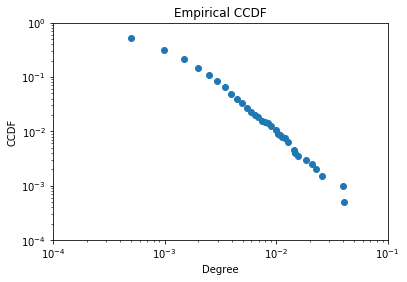

In [174]:
x, f = np.unique(cent, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-4, 10**0)
plt.xlim(1*10**-4, 10**-1)
plt.show()

#### 5.2) Betweeness

In [166]:
btw = np.array(list(nx.betweenness_centrality(G).values()))
print('Máximo:', btw.max())
print('Mínimo:', btw.min())
print('Média:', btw.mean())
print('Mediana:', median(btw))
print('Desvio padrão:', btw.std())

Máximo: 0.18151976215555363
Mínimo: 0.0
Média: 0.0015236220900641463
Mediana: 0.0
Desvio padrão: 0.006881556812597941


CCDF:

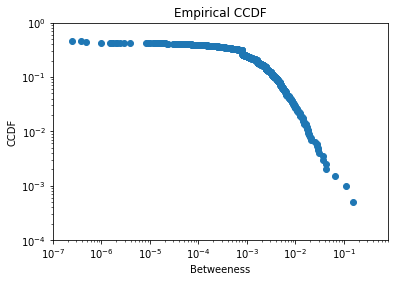

In [176]:
x, f = np.unique(btw, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Betweeness')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-4, 10**0)
plt.xlim(10**-7, 8*10**-1)
plt.show()

Visualziação do Betweenes:

In [24]:
#nx.draw_circular(G, node_color=btw, cmap=plt.cm.Blues, with_labels=True)

#### 5.3) Closeness

In [178]:
close = np.array(list(nx.closeness_centrality(G).values()))
print('Máximo:', close.max())
print('Mínimo:', close.min())
print('Média:', close.mean())
print('Mediana:', median(close))
print('Desvio padrão:', close.std())

Máximo: 0.24498275690734178
Mínimo: 0.0
Média: 0.1224292730964651
Mediana: 0.14145329150410224
Desvio padrão: 0.06225392075786067


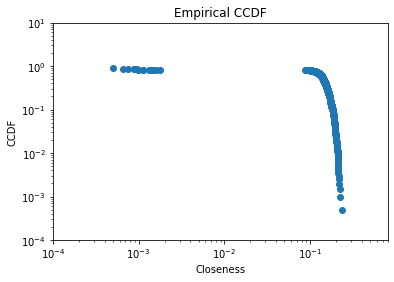

In [183]:
x, f = np.unique(close, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Closeness')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-4, 10**1)
plt.xlim(10**-4, 8*10**-1)
plt.show()

In [180]:
#nx.draw_circular(G, node_color=close, cmap=plt.cm.Blues, with_labels=True)

#### 5.4) Auto-Vetor

In [184]:
ev = np.array(list(nx.eigenvector_centrality(G).values()))
print('Máximo:', ev.max())
print('Mínimo:', ev.min())
print('Média:', ev.mean())
print('Mediana:', median(ev))
print('Desvio padrão:', ev.std())

Máximo: 0.4654668822552674
Mínimo: 4.323660793748502e-25
Média: 0.006895226561824924
Mediana: 0.0005193122373762252
Desvio padrão: 0.021165915747076533


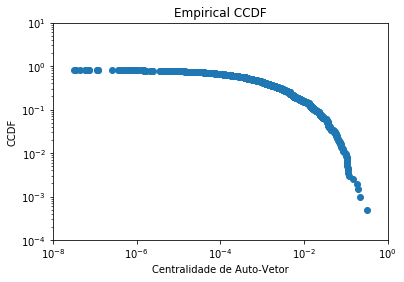

In [191]:
x, f = np.unique(ev, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Centralidade de Auto-Vetor')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-4, 10**1)
plt.xlim(10**-8, 10**0)
plt.show()

In [30]:
#nx.draw_circular(G, node_color=ev, cmap=plt.cm.Blues, with_labels=True)

#### 5.6) PageRank

In [195]:
pr = np.array(list(nx.pagerank(G, alpha=0.9).values()))
print('Máximo:', pr.max())
print('Mínimo:', pr.min())
print('Média:', pr.mean())
print('Mediana:', median(pr))
print('Desvio padrão:', pr.std())

Máximo: 0.011017112062038982
Mínimo: 0.00015398258328035226
Média: 0.0004955401387512387
Mediana: 0.000381439616484525
Desvio padrão: 0.0006186174251784557


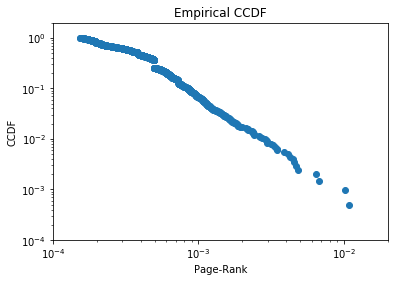

In [200]:
x, f = np.unique(pr, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Page-Rank')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-4, 2*10**0)
plt.xlim(10**-4, 2*10**-2)
plt.show()

In [33]:
#nx.draw_circular(G, node_color=pr, cmap=plt.cm.Blues, with_labels=True)

### 5) Similaridade

#### 5.1) Jaccard

In [202]:
jaccard = np.array([p for (u, v, p) in nx.jaccard_coefficient(G)])
print('Máximo:', jaccard.max())
print('Mínimo:', jaccard.min())
print('Média:', jaccard.mean())
print('Mediana:', median(jaccard))
print('Desvio padrão:', jaccard.std())

Máximo: 1.0
Mínimo: 0.0
Média: 0.0024313333912945635
Mediana: 0.0
Desvio padrão: 0.033385140219770904


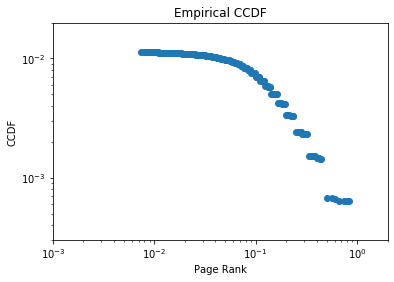

In [213]:
x, f = np.unique(jaccard, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Jaccard')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(3*10**-4, 2*10**-2)
plt.xlim(10**-3, 2*10**0)
plt.show()

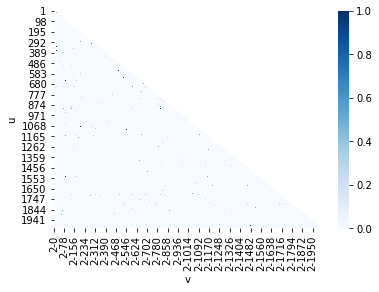

In [36]:
mapa = [[u,v, p] for (u, v, p) in nx.jaccard_coefficient(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
#plt.xticks(locs,range(1,33,2))
plt.xlabel('v')
plt.ylabel('u')
plt.show()

#### 5.2) Adamic/Adar

In [214]:
adamic = np.array([p for (u, v, p) in nx.adamic_adar_index(G)])
print('Máximo:', adamic.max())
print('Mínimo:', adamic.min())
print('Média:', adamic.mean())
print('Mediana:', median(adamic))
print('Desvio padrão:', adamic.std())

Máximo: 14.30304051308118
Mínimo: 0.0
Média: 0.004368381235791592
Mediana: 0.0
Desvio padrão: 0.05574718405356366


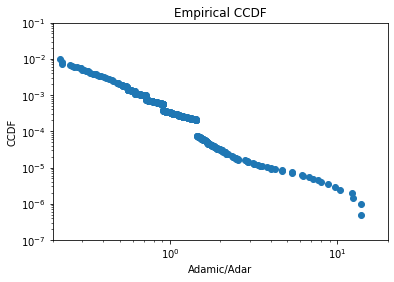

In [221]:
x, f = np.unique(adamic, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Adamic/Adar')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-7, 10**-1)
plt.xlim(2*10**-1, 2*10**1)
plt.show()

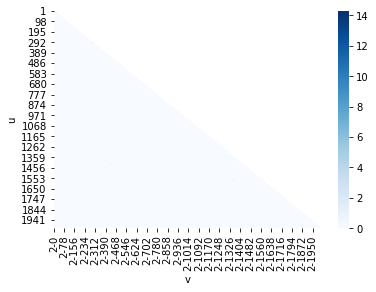

In [39]:
#pairs = dict([((u,v), p) for (u, v, p) in nx.adamic_adar_index(G)])
mapa = [[u,v, p] for (u, v, p) in nx.adamic_adar_index(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
#plt.xticks(locs,range(1,34,2))
plt.xlabel('v')
plt.ylabel('u')
plt.show()